<br>
<center>
<h1>Workforce Analytics</h1>
<h2><i> - Group C  -</i></h2>
<h2><i>Lingyao Li(CID: 01372413), Maja Pavlovic(CID: 01424376), Mark O'Shea(CID: 01384962)</i></h2>
<h2><i> Nina Hauser(CID: 01418616), Seongmin Lee(CID: 01247436)</i></h2>
<h2><i>Vasileios Papageorgiou(CID: 01288911)</i></h2>

In [13]:
import pandas as pd
import numpy as np
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import requests
import re
import sys
import io
import time
from collections import Counter
import os

In [14]:
os.chdir('C:/Users/seong/Documents/00. Summer/1. Workforce/Assignments/final/Data')

In [15]:
data = pd.read_pickle('employees_df.pkl')
universities = pd.read_csv('world-universities.csv', header = None)
universities.columns = ['countrycode', 'uni', 'url']
unis_loop = universities['uni']

# Variable1: Network Feature

## A. Attended Universities

### Elite University Graduates
Quality of education and teaching highly influence the career path of professors to be. Elite universities produce elite career prospects. We selected the top20-universities that - besides the Imperial College London- mark the top locations of teaching & research ([Times Higher Education Ranking](https://www.timeshighereducation.com/world-university-rankings/2018/world-ranking#!/page/0/length/25/sort_by/rank/sort_order/asc/cols/stats), filtered them out of the personal summaries and looked at both the number of professors coming from other elite universities.

In [16]:
top20 = ['University of Oxford', 'University of Cambridge', 'California Institute of Technology', 
         'Stanford University', 'Massachusetts Institute of Technology','Massachusetts Institute of Technology', 
         'Harvard University', 'University of Chicago', 'Swiss Federal Institute of Technology, Zurich', 
         'University of Pennsylvania', 'Yale University', 'Johns Hopkins University', 
         'Columbia University', 'University of California', 'University of California', 
         'Duke University', 'University of California', 'Cornell University', 
         'Northwestern University']
top20_short = ['Oxford', 'Cambridge', 'California', 
               'Stanford', 'Massachusetts','MIT', 
               'Harvard', 'Chicago', 'ETH', 
               'Pennsylvania', 'Yale', 'Hopkins', 
               'Columbia', 'California', 'UCL', 
               'Duke', 'Berkeley', 'Cornell', 
               'Northwestern']
print('The Top 20 Universities besides Imperial College London are:', set(top20))

The Top 20 Universities besides Imperial College London are: {'University of Oxford', 'University of Chicago', 'Duke University', 'Harvard University', 'Northwestern University', 'University of California', 'Stanford University', 'Massachusetts Institute of Technology', 'Columbia University', 'Yale University', 'California Institute of Technology', 'University of Pennsylvania', 'Cornell University', 'Johns Hopkins University', 'Swiss Federal Institute of Technology, Zurich', 'University of Cambridge'}


In [17]:
#create lists of elite university variables: if, how many and which
top20_binary = []
top20_count = []
top20_which = []

for index, row in data.iterrows():
    #get the personal summary
    summary = row['personal_summary']
    #create a set of top20 universities a staff member attended
    top20_list = set()
    for word in summary.split():
        if word in top20_short:
            top20_list.add(top20[top20_short.index(word)])
    #count number of elite universities
    count = len(top20_list)
    #add binary variable of attendance
    if count > 0:
        binary = 1
    else:
        binary = 0
    top20_binary.append(binary)
    top20_count.append(count)
    top20_which.append(top20_list)

In [21]:
#create a list of attended universities
unis = []
for index, row in data.iterrows():
    summary = row['personal_summary']
    uni_list = set()
    for uni in unis_loop:
        if uni in summary and uni != 'Imperial College London':
            uni_list.add(uni)
    unis.append(uni_list)

In [23]:
#add lists as columns
data['top20_binary'] = top20_binary
data['top20_count'] = top20_count
data['top20_which'] = top20_which
data['unis'] = unis

In [24]:
data.head()

,department,last_name,first_name,Title1,Title2,title_clean,personal_summary,person_id,colleagues,summary_length,...,department_tenure_diversity,department_gender_diversity,department_ethnic_diversity,cluster_tenure_diversity,cluster_gender_diversity,cluster_ethnic_diversity,top20_binary,top20_count,top20_which,unis
0,Department of Finance,Abadir,Karim,Professor,Emeritus Professor,Professor,Karim Abadir is Emeritus Professor of Financia...,k.m.abadir,35,410,...,0.669388,0.507755,0.364082,0.717496,0.564587,0.31842,1,2,"{University of Oxford, University of Cambridge}","{University of York, University of Exeter, Ame..."
1,Department of Finance,Allen,Franklin,Professor,Executive Director,Professor,Franklin Allen is Professor of Finance and Eco...,f.allen,35,129,...,0.669388,0.507755,0.364082,0.717496,0.564587,0.31842,1,2,"{University of Oxford, University of Pennsylva...",{University of Pennsylvania}
2,Department of Finance,Begg,David,Professor,Emeritus Professor,Professor,David Begg is Professor of Economics at Imperi...,d.begg,35,136,...,0.669388,0.507755,0.364082,0.717496,0.564587,0.31842,0,0,{},{}
3,Department of Finance,Bhamra,Harjoat,Dr,Associate Professor,Associate Professor,,h.bhamra,35,0,...,0.669388,0.507755,0.364082,0.717496,0.564587,0.31842,0,0,{},{}
4,Department of Finance,Biais,Bruno,Professor,Professor,Professor,,b.biais,35,0,...,0.669388,0.507755,0.364082,0.717496,0.564587,0.31842,0,0,{},{}


In [25]:
#check whether elite universites are included in uni
for index, row in data.iterrows():
    elite = row['top20_which']
    for elite_uni in elite:
        for uni in unis_loop:
            if elite_uni == uni:
                data['unis'][index].add(uni)

In [26]:
data[['person_id', 'top20_binary', 'top20_count', 'top20_which', 'unis']].head(10)

,person_id,top20_binary,top20_count,top20_which,unis
0,k.m.abadir,1,2,"{University of Oxford, University of Cambridge}","{University of Oxford, American University, Un..."
1,f.allen,1,2,"{University of Oxford, University of Pennsylva...","{University of Oxford, University of Pennsylva..."
2,d.begg,0,0,{},{}
3,h.bhamra,0,0,{},{}
4,b.biais,0,0,{},{}
5,e.biffis,0,0,{},{Georgia State University}
6,j.vos,1,1,{University of Chicago},"{University of Chicago, Erasmus University Rot..."
7,a.buraschi,1,2,"{University of Chicago, Columbia University}","{Columbia University, University of Chicago, L..."
8,l.cathcart,0,0,{},"{Birkbeck College, University of London, Unive..."
9,g.chemla,0,0,{},"{University of British Columbia, Sauder School..."


In [140]:
df_filtered = data[data['top20_which'] != set()]
print(len(df_filtered), "staff members went to Top20-universities besides Imperial.",)
print("That is equal to", 100*round(len(df_filtered)/len(data),4), 'percent.')

37 staff members went to Top20-universities besides Imperial.
That is equal to 33.64 percent.


In the end, we did not choose to include elite universities with the reason being primarily that Imperial College London is also included in the Top20 of the Times Higher Education Ranking. However, we presented the results to show what can be used in further analysis and focussed on another aspect of university attendance - the network effects of having attended the same universities.

## B. Network Features

We evaluated whether staff members went to the same universities. We assumed that similar backgrounds lead to similar work ethics and work quality as well as improvements in the work environment and hereby enhance the quality of teamwork altogether.

As a measurement of centrality, we compared four options: Degree centrality, betweenness centrality, closeness centrality and eigenvector centrality. Degree centrality simply measures the number of links attached to a node. In this case this refers to the number of other staff members that attended the same universities as the staff member in question. Closeness centrality refers to the closeness to other nodes. Betweenness centrality measures how often a node serves as a 'bridge' on the shortest path between to nodes, indicating who influences the network most, and eigenvector centrality quantifies both the number and quality of connections, in this case referring to the number of universities staff attended together. The values range between 1 to up to 4 shared career stations. As in this case both the number of relationships and similarity of career paths is important, we chose eigenvector centrality as a feature variable.

In [27]:
data.head()

,department,last_name,first_name,Title1,Title2,title_clean,personal_summary,person_id,colleagues,summary_length,...,department_tenure_diversity,department_gender_diversity,department_ethnic_diversity,cluster_tenure_diversity,cluster_gender_diversity,cluster_ethnic_diversity,top20_binary,top20_count,top20_which,unis
0,Department of Finance,Abadir,Karim,Professor,Emeritus Professor,Professor,Karim Abadir is Emeritus Professor of Financia...,k.m.abadir,35,410,...,0.669388,0.507755,0.364082,0.717496,0.564587,0.31842,1,2,"{University of Oxford, University of Cambridge}","{University of Oxford, American University, Un..."
1,Department of Finance,Allen,Franklin,Professor,Executive Director,Professor,Franklin Allen is Professor of Finance and Eco...,f.allen,35,129,...,0.669388,0.507755,0.364082,0.717496,0.564587,0.31842,1,2,"{University of Oxford, University of Pennsylva...","{University of Oxford, University of Pennsylva..."
2,Department of Finance,Begg,David,Professor,Emeritus Professor,Professor,David Begg is Professor of Economics at Imperi...,d.begg,35,136,...,0.669388,0.507755,0.364082,0.717496,0.564587,0.31842,0,0,{},{}
3,Department of Finance,Bhamra,Harjoat,Dr,Associate Professor,Associate Professor,,h.bhamra,35,0,...,0.669388,0.507755,0.364082,0.717496,0.564587,0.31842,0,0,{},{}
4,Department of Finance,Biais,Bruno,Professor,Professor,Professor,,b.biais,35,0,...,0.669388,0.507755,0.364082,0.717496,0.564587,0.31842,0,0,{},{}


In [28]:
staff1 = []
staff2 = []
weight = []

#loop over uni column to derive number of unis two members of staff have in common
for index1, row1 in data.iterrows():
    for index2, row2 in data.iterrows():
        common_unis = data['unis'][index1].intersection(data['unis'][index2])
        staff1.append(index1)
        staff2.append(index2)
        weight.append(len(common_unis))

In [34]:
data['unis'][1].intersection(data['unis'][0])

{'University of Oxford'}

In [142]:
#create dataframe
network = pd.DataFrame({'staff1': staff1,'staff2': staff2,'weight': weight})

#filter out staff that do not have unis in common
network_filtered = network[(network['weight'] > 0) & (network['staff1'] != network['staff2'])]
network_filtered.head()

,staff1,staff2,weight
1,0,1,1
13,0,13,2
21,0,21,2
27,0,27,2
30,0,30,1


In [143]:
###create a graph
G = nx.from_pandas_edgelist(network_filtered, 'staff1', 'staff2', ['weight'])

#calculate degrees
d = nx.degree(G)
d_scale = [(int(d[node])) * 70 for node in G.nodes()]

#calculate betweenness centrality
btw = nx.betweenness_centrality(G, normalized=True, weight = 'weight')
btw_scale = [4000 * (btw[i] + 0.1) for i in G.nodes()]

#calculate closeness centrality
cl = nx.closeness_centrality(G)
cl_scale = [2000 * (cl[i] + 0.01) for i in G.nodes()]

#calculate eigenvector centrality
ev = nx.eigenvector_centrality(G, weight = 'weight')
ev_scale = [2000 * (ev[i] + 0.01) for i in G.nodes()]

#add weights
listi = []
for i in G.edges(data = True):
    x = i[2].get('weight')
    x = x
    listi.append(abs(x))

#create labels
labels = {}
for i in G.nodes(data = True):
    old_name = i[0]
    name = data.iloc[i[0],1]
    labels[old_name] = name
nx.relabel_nodes(G, labels)

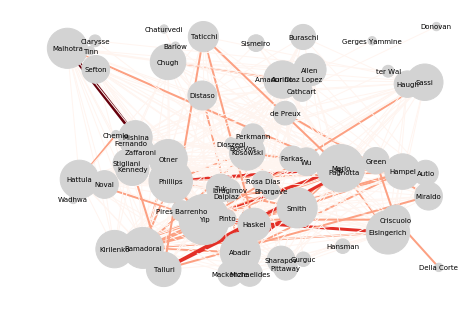

In [144]:
###draw graph with degree as nodesize
#degree is the number of connections
nx.draw_random(G, labels = labels, node_color='lightgrey', node_size = d_scale, edgelist=G.edges(), width = listi, edge_color=listi, edge_cmap=plt.cm.Reds, font_size=7)
plt.show()

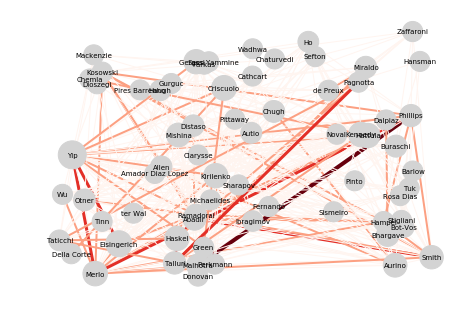

In [145]:
###draw graph with betweenness centrality as nodesize
#quantifies the number of times a node acts as a bridge along the shortest path between two other nodes
nx.draw_random(G, labels = labels, node_color='lightgrey', node_size = btw_scale, edgelist=G.edges(), width = listi, edge_color=listi, edge_cmap=plt.cm.Reds, font_size=7)
plt.show()

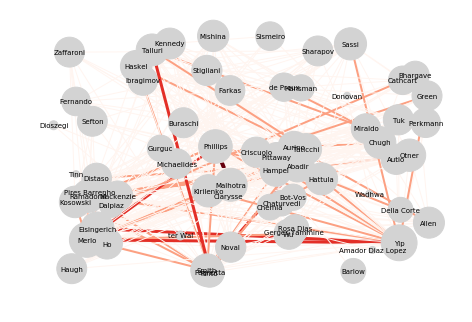

In [146]:
###draw graph with closeness centrality as nodesize
#quantifies the number of times a node acts as a bridge along the shortest path between two other nodes
nx.draw_random(G, labels = labels, node_color='lightgrey', node_size = cl_scale, edgelist=G.edges(), width = listi, edge_color=listi, edge_cmap=plt.cm.Reds, font_size=7)
plt.show()

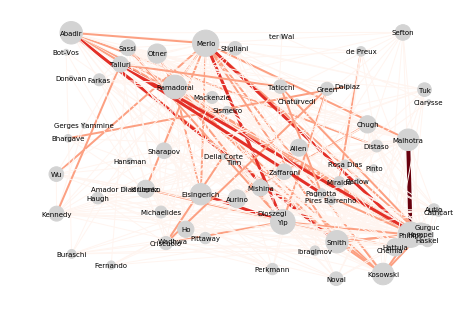

In [147]:
###draw graph with eigenvector as nodesize
#depends both on the number of neighbors and the quality of the link
nx.draw_random(G, labels = labels, node_color='lightgrey', node_size = ev_scale, edgelist=G.edges(), width = listi, edge_color=listi, edge_cmap=plt.cm.Reds, font_size=7)
plt.show()

In [190]:
#create a list of eigenvector values with empty values
nodes = sorted([i for i in ev.keys()])
print('We identified', len(G.nodes()), 'members of staff who went to a university at least one other staff member attended.')
print('Among them we found', len(G.edges()), 'common career stations.')

helper = []
for index, row in data.iterrows():
    if index in nodes:
        helper.append(ev[index])
    else:
        helper.append(0)

data['Network Feature'] = helper

We identified 68 members of staff who went to a university at least one other staff member attended.
Among them we found 375 common career stations.


# Variable2: The number of research fields


## A. Create the urls linked with the professors' publications tab

In [154]:
# website links for the professors in the dataset
employees_df = data
urls = 'http://www.imperial.ac.uk/people/'+ employees_df['person_id'] + '/publications.html?limit=400'
print("PROFESSOR FRANKLIN ALLEN Imperial Website:",urls[1])

PROFESSOR FRANKLIN ALLEN Imperial Website: http://www.imperial.ac.uk/people/f.allen/publications.html?limit=400


## B. Web Scraping Summary
Based on the combination of 'www.imperial.ac.uk/people/'+ employees_df['person_id'] + '/publications.html?limit=400', we could build the direct links to see the whole publications of each professor at the Imperial website. And we found out that the hyperlinks on "Author Web Link" in the publications tab are directly linked with the "Web of Science", which allows us to search each document information in details, such as categories of research areas. In other words, this information system could provide research fields regarding each professor’s publications at imperial. Therefore, by using the python web scrapping modules, such as beautifulsoup and selenium, we could collect a set of research categories for each staff. As a result, those sets were used to create a proxy variable of measuring the cognitive diversity in terms of knowledge processing.

## C. Crawling Process

<img src="crawling_final.png",width=800>

In [ ]:
person_by_research_set = {}
ind = 0
chrome_options = Options()
driver = webdriver.Chrome(chrome_options=chrome_options,executable_path="C:/Users/seong/Downloads/chrome/chromedriver")
for url, ids in zip(urls[0:21], employees_df['person_id'][0:21]):
    ind += 1
    web_of_science_links = []
    research_range = set()
    contents = requests.get(url)    
    soup = BeautifulSoup(contents.text, 'html.parser')
    try:
        if 'not yet been published' in soup.select_one('div#customContent > p').string: 
            continue #Some prof. does not have imperial website published (ex)'http://www.imperial.ac.uk/people/r.iyer/publications.html?limit=400') 
    except:
        pass
    co_authors = soup.select("div.publication > p.publication-info")
    links = soup.find_all("a", {"class":"author-link"}) 
    
    for link in links:
        if 'http://gateway.webofknowledge.com' in str(link): #some of urls are incorrect
            web_of_science_links.append(link.attrs['href']) # collecting the author docs url linked on "web of science" which links with
        
    research_range = set()
    for w_link in web_of_science_links:
        
        #Log-in on Web of Science
        driver.get('https://login.webofknowledge.com/error/Error?PathInfo=%2F&Error=IPError')
        driver.implicitly_wait(5)
        driver.find_element_by_name('username').send_keys('id') #email id
        driver.implicitly_wait(5)
        driver.find_element_by_name('password').send_keys('pss') #password
        driver.implicitly_wait(5)
        driver.find_element_by_xpath('//*[@id="WoKerror"]/div/table[2]/tbody/tr/td[2]/form[1]/table/tbody/tr[3]/td[2]/a/button').click() #click
        try:
            elem = driver.find_element_by_xpath('//*[@id="WoKerror"]/div/table[2]/tbody/tr/td[2]/p/a[1]').click() #exception log-in
        except:
            pass
        # parsing the set of research category for each paper
        driver.get(w_link)
        web_soup = BeautifulSoup(driver.page_source, 'html.parser')
        web_research_field = web_soup.find_all("p", {'class':'FR_field'})
        field_sum = ([i.find("span", text = re.compile("^Web of Science")).next_sibling for i in web_research_field if i.find("span", text = re.compile("^Web of Science")) is not None])
        field_sum_modified = [i.lstrip().rstrip() for i in re.split(',|;',(''.join(field_sum[0])))] 
        research_range.update(field_sum_modified)
        #time.sleep(5)
    person_by_research_set[ids]= list(research_range)
driver.quit()

## D. Crawling Result

In [180]:
# Crawling Result
person_by_research_set = {'k.m.abadir': ['Interdisciplinary Applications', 'Multidisciplinary', 'Mathematical', 'Physics', 'Social Sciences', 'Mathematics', 'Mathematical Methods', 'Economics', 'Statistics & Probability'], 'f.allen': ['Interdisciplinary Applications', 'Business', 'Law', 'International Relations', 'Management', 'Operations Research & Management Science', 'Finance', 'Social Sciences', 'Public Administration', 'Mathematics', 'Mathematical Methods', 'Economics', 'Statistics & Probability'], 'd.begg': ['Economics'], 'h.bhamra': ['Finance', 'Economics', 'Business'], 'e.biffis': ['Interdisciplinary Applications', 'Business', 'Public', 'Social Sciences', 'Environmental & Occupational Health', 'Finance', 'Mathematics', 'Mathematical Methods', 'Economics', 'Applied', 'Statistics & Probability'], 'j.vos': [], 'a.buraschi': ['Business', 'Management', 'Operations Research & Management Science', 'Finance', 'Economics'], 'l.cathcart': ['Finance', 'Economics', 'Business'], 'g.chemla': ['Business', 'Management', 'Operations Research & Management Science', 'Finance', 'Economics'], 'c.custodio': [], 'p.dellacorte': ['Business', 'Finance', 'Social Sciences', 'Mathematical Methods', 'Economics'], 'w.distaso': ['Interdisciplinary Applications', 'Business', 'Finance', 'Social Sciences', 'Mathematics', 'Mathematical Methods', 'Economics', 'Statistics & Probability'], 's.ferdous': [], 'j.fernando': [], 'c.hansman': [], 'i.rustam': ['Interdisciplinary Applications', 'Business', 'Management', 'Operations Research & Management Science', 'Finance', 'Social Sciences', 'Mathematics', 'Mathematical Methods', 'Economics', 'Statistics & Probability'], 'm.kacperczyk': ['Interdisciplinary Applications', 'Business', 'Finance', 'Social Sciences', 'Mathematics', 'Mathematical Methods', 'Economics', 'Statistics & Probability'], 'a.kirilenko': ['Finance', 'Economics', 'Business'], 'r.kosowski': ['Finance', 'Economics', 'Business'], 'n.meade': ['Energy & Fuels', 'Interdisciplinary Applications', 'Business', 'Engineering', 'Industrial', 'Planning & Development', 'Environmental Studies', 'Management', 'Operations Research & Management Science', 'Computer Science', 'Finance', 'Environmental Sciences', 'Social Sciences', 'Mathematics', 'Mathematical Methods', 'Economics', 'Applied', 'Statistics & Probability'], 'a.michaelides': ['Interdisciplinary Applications', 'Business', 'Political Science', 'Finance', 'Social Sciences', 'Mathematics', 'Mathematical Methods', 'Economics'], 'd.miles': ['Business', 'Oncology', 'Political Science', 'Finance', 'Economics'], 'e.pagnotta': [], 't.ramadorai': ['Finance', 'Economics', 'Business'], 'yining.shi09': [], 'j.sefton': ['Business', 'Engineering', 'Electrical & Electronic', 'Finance', 'Demography', 'Sociology', 'Economics', 'Automation & Control Systems'], 's.stoyanova': [], 's.sundaresan': [], 'k.tinn': ['Economics'], 'p.zaffaroni': ['Interdisciplinary Applications', 'Business', 'Finance', 'Social Sciences', 'Mathematics', 'Mathematical Methods', 'Economics', 'Statistics & Probability'], 'erkko.autio': ['Social Issues', 'Industrial', 'Business', 'Engineering', 'Interdisciplinary Applications', 'Multidisciplinary Sciences', 'Planning & Development', 'Multidisciplinary', 'Management', 'Computer Science', 'Operations Research & Management Science', 'Finance', 'Social Sciences', 'Interdisciplinary', 'Economics'], 'rod.ball': ['Business', 'Management'], 'h.chugh': [], 'b.clarysse': ['Medical Laboratory Technology', 'Industrial', 'Business', 'Engineering', 'Multidisciplinary Sciences', 'Planning & Development', 'Multidisciplinary', 'Information Systems', 'Management', 'Operations Research & Management Science', 'Computer Science', 'Finance', 'Public', 'Environmental & Occupational Health', 'Medical Informatics', 'Information Science & Library Science', 'Economics', 'Education & Educational Research', 'Health Care Sciences & Services'], 'p.criscuolo': ['Industrial', 'Business', 'Engineering', 'Interdisciplinary Applications', 'Planning & Development', 'Information Systems', 'Management', 'Computer Science', 'Information Science & Library Science', 'Economics'], 'b.dioszegi': ['Business', 'Management'], 'r.gerges-yammine': [], 'z.gurguc': ['Energy & Fuels', 'Economics', 'Environmental Sciences', 'Environmental Studies'], 'c.hampel': [], 'alan.hughes': ['Industrial Relations & Labor', 'Industrial', 'Business', 'Engineering', 'Multidisciplinary Sciences', 'Law', 'Planning & Development', 'Management', 'Operations Research & Management Science', 'Finance', 'Geography', 'Sociology', 'Economics', 'Environmental Studies'], 'hj.jung': ['Business', 'Management'], 'jaemin.lee': [], 'm.meuleman': ['Industrial Relations & Labor', 'Business', 'Management', 'Finance', 'Social Sciences', 'Interdisciplinary'], 'j.oconnor': [], 'm.perkmann': ['Planning & Development', 'Management', 'Geography', 'Urban Studies', 'Economics', 'Environmental Studies'], 'jeffrey.pittaway': ['Social Issues', 'Software Engineering', 'Information Systems', 'Management', 'Computer Science', 'Information Science & Library Science'], 'dmitry.sharapov': ['Business', 'Management', 'Political Science'], 'i.stigliani': ['Applied', 'Business', 'Management', 'Psychology'], 'a.terwal': ['Industrial', 'Business', 'Engineering', 'Planning & Development', 'Management', 'Operations Research & Management Science', 'Geography', 'Social Sciences', 'Interdisciplinary', 'Public Administration', 'Economics', 'Environmental Studies', 'Statistics & Probability'], 'a.wadhwa': ['Business', 'Management'], 'mike.wright': ['Business', 'Psychology', 'Multidisciplinary Sciences', 'Multidisciplinary', 'Electrical & Electronic', 'Political Science', 'Operations Research & Management Science', 'Social Sciences', 'History Of Social Sciences', 'Education & Educational Research', 'Geography', 'Applied', 'Environmental Sciences', 'Economics', 'Industrial Relations & Labor', 'Energy & Fuels', 'Planning & Development', 'Ethics', 'Area Studies', 'Industrial', 'Engineering', 'International Relations', 'Management', 'Finance', 'Interdisciplinary', 'Public Administration', 'Mathematical Methods', 'Environmental Studies'], 'j.amador': [], 'e.aurino': ['Nutrition & Dietetics', 'Research & Experimental', 'Medicine', 'Multidisciplinary Sciences', 'General & Internal', 'Planning & Development', 'Food Science & Technology', 'Endocrinology & Metabolism', 'Public', 'Environmental & Occupational Health', 'Economics'], 'j.barlow': ['Business', 'Political Science', 'Operations Research & Management Science', 'Social Sciences', 'Anesthesiology', 'Urology & Nephrology', 'Geography', 'Urban Studies', 'Construction & Building Technology', 'Economics', 'Planning & Development', 'Primary Health Care', 'Geriatrics & Gerontology', 'Sociology', 'Health Care Sciences & Services', 'Industrial', 'Engineering', 'Medicine', 'General & Internal', 'Gerontology', 'Management', 'Biomedical', 'Public', 'Medical Informatics', 'Environmental & Occupational Health', 'Public Administration', 'Mathematical Methods', 'Health Policy & Services', 'Environmental Studies'], 'r.bhargave': ['Social', 'Psychology', 'Applied'], 'e.boler': ['Economics'], 'sankalp.chaturvedi': ['Energy & Fuels', 'Psychiatry', 'Business', 'Psychology', 'Behavioral Sciences', 'Environmental Studies', 'Multidisciplinary', 'Surgery', 'Management', 'Clinical', 'Genetics & Heredity', 'Environmental Sciences', 'Economics', 'Social', 'Applied'], 'zhi.chen': [], 'b.cox': ['Multidisciplinary', 'Electrical & Electronic', 'Education', 'Computer Science', 'Operations Research & Management Science', 'Transplantation', 'Scientific Disciplines', 'Biochemical Research Methods', 'Biotechnology & Applied Microbiology', 'Education & Educational Research', 'Information Systems', 'Economics', 'Social Issues', 'Surgery', 'Mathematical & Computational Biology', 'Health Care Sciences & Services', 'Theory & Methods', 'Industrial', 'Engineering', 'Medicine', 'General & Internal', 'Management', 'Information Science & Library Science', 'Medical Informatics', 'Health Policy & Services'], 'e.dalpiaz': ['Business', 'Management'], 'l.depreux': ['Business', 'Health Care Sciences & Services', 'Environmental Sciences', 'Health Policy & Services', 'Economics', 'Environmental Studies', 'Ecology'], 'c.donovan': [], 'a.eisingerich': ['Business', 'Psychology', 'Multidisciplinary Sciences', 'Respiratory System', 'Medicine', 'General & Internal', 'Planning & Development', 'Management', 'Operations Research & Management Science', 'Medical Informatics', 'Economics', 'Applied'], 'm.farkas': ['Management'], 'j.geske': [], 'p.goodridge10': ['Mathematical Methods', 'Economics', 'Social Sciences', 'Statistics & Probability'], 'r.green': ['Energy & Fuels', 'Industrial', 'Engineering', 'Business', 'Electrochemistry', 'GREEN & SUSTAINABLE SCIENCE & TECHNOLOGY', 'Physical', 'Multidisciplinary', 'Electrical & Electronic', 'Management', 'Operations Research & Management Science', 'Thermodynamics', 'Finance', 'Environmental Sciences', 'Materials Science', 'Public Administration', 'Economics', 'Chemistry', 'Environmental Studies'], 'j.haskel': ['Industrial Relations & Labor', 'Business', 'Management', 'Finance', 'Social Sciences', 'Urban Studies', 'Mathematical Methods', 'Economics', 'Statistics & Probability'], 'j.hattula': ['Business'], 'm.haugh': [], 'c.ho12': [], 'mark.kennedy': ['Literature', 'Sociology', 'Business', 'Management'], 'r.kosova': ['Business', 'Hospitality', 'Management', 'Geography', 'Social Sciences', 'Finance', 'Urban Studies', 'Leisure', 'Sociology', 'Sport & Tourism', 'Mathematical Methods', 'Economics', 'Environmental Studies'], 'c.love': [], 'ian.mackenzie': [], 'n.malhotra': ['Business', 'Management'], 'r.martin': ['Energy & Fuels', 'Business', 'Environmental Sciences', 'Social Sciences', 'Mathematical Methods', 'Economics', 'Environmental Studies'], 'o.merlo': ['Business', 'Management', 'Computer Science', 'Operations Research & Management Science', 'Artificial Intelligence'], 's.mikolon': [], 'm.miraldo': ['Psychology', 'Medicine', 'General & Internal', 'Multidisciplinary Sciences', 'Orthopedics', 'Surgery', 'Pharmacology & Pharmacy', 'Clinical', 'Public', 'Medical Informatics', 'Environmental & Occupational Health', 'Sport Sciences', 'Health Policy & Services', 'Economics', 'Health Care Sciences & Services'], 'y.mishina': ['Business', 'Management'], 'l.noval': ['Business', 'Psychology', 'Ethics', 'Management', 'Social', 'Applied'], 's.otner': [], 'n.phillips': ['Industrial', 'Business', 'Psychology', 'Engineering', 'Planning & Development', 'Ethics', 'Hospitality', 'Surgery', 'Management', 'Operations Research & Management Science', 'Applied', 'Social Sciences', 'Leisure', 'Interdisciplinary', 'Sport & Tourism', 'Sociology', 'Education & Educational Research'], 'eliana.barrenho': ['Public', 'Psychiatry', 'Environmental & Occupational Health', 'Health Policy & Services'], 'j.pinto': ['Business', 'Psychology', 'GREEN & SUSTAINABLE SCIENCE & TECHNOLOGY', 'Management', 'Education & Educational Research', 'Environmental Sciences', 'Social Sciences', 'Interdisciplinary', 'Applied'], 'c.propper': ['Business', 'Psychology', 'Political Science', 'Social Sciences', 'Pediatrics', 'Geography', 'Demography', 'Urban Studies', 'Economics', 'Social Work', 'Social Issues', 'Industrial Relations & Labor', 'Psychiatry', 'Endocrinology & Metabolism', 'Sociology', 'Developmental', 'Health Care Sciences & Services', 'Medicine', 'General & Internal', 'Biomedical', 'Public', 'Finance', 'Environmental & Occupational Health', 'Public Administration', 'Mathematical Methods', 'Health Policy & Services', 'Environmental Studies', 'Statistics & Probability'], 'h.peura': ['Operations Research & Management Science', 'Management'], 'p.rosa-dias': [], 'jan.ross': ['Information Science & Library Science'], 'r.sanchis-guarner': [], 'f.sassi': ['Psychiatry', 'Nutrition & Dietetics', 'Medicine', 'General & Internal', 'Pharmacology & Pharmacy', 'Public', 'Environmental & Occupational Health', 'Health Policy & Services', 'Substance Abuse', 'Economics', 'Health Care Sciences & Services'], 'c.sismeiro': ['Theory & Methods', 'Imaging Science & Photographic Technology', 'Business', 'Software Engineering', 'Multidisciplinary Sciences', 'Engineering', 'Information Systems', 'Electrical & Electronic', 'Management', 'Computer Science', 'Artificial Intelligence', 'Operations Research & Management Science'], 'peter.smith': ['Multidisciplinary Sciences', 'Political Science', 'Operations Research & Management Science', 'Social Sciences', 'Nursing', 'Oncology', 'Economics', 'Surgery', 'Rehabilitation', 'Health Care Sciences & Services', 'Medicine', 'General & Internal', 'International Relations', 'Biomedical', 'Management', 'Public', 'Medical Informatics', 'Environmental & Occupational Health', 'Public Administration', 'Mathematical Methods', 'Health Policy & Services', 'Statistics & Probability'], 'kalyan.talluri': [], 'p.taticchi': [], 'm.tuk': ['Business', 'Psychology', 'Experimental', 'Multidisciplinary', 'Management', 'Sociology', 'Social', 'Applied'], 't.valletti': ['Communication', 'Business', 'Law', 'Telecommunications', 'Management', 'Information Science & Library Science', 'Finance', 'Urban Studies', 'Health Policy & Services', 'Economics', 'Environmental Studies'], 'a.veiga': [], 'a.vernet': ['Psychology', 'Management', 'Sociology', 'Economics', 'Applied'], 'ww': [], 'o.williams': [], 'j.wu': ['Operations Research & Management Science', 'Management'], 'g.yildirim': ['Business'], 'g.yip': ['Planning & Development', 'International Relations', 'Business', 'Management']}

## E. Table Join

In [181]:
#dictionary to dataframe
research_field_df = pd.DataFrame({'person_id':list(person_by_research_set.keys()), 'research_field':list(person_by_research_set.values())})
merged_df = employees_df.merge(research_field_df, on = 'person_id', how = 'left')

In [182]:
research_field_number = []
for f_list in merged_df['research_field']:
    if type(f_list) == list and len(f_list) > 0: 
        research_field_number.append(len(f_list))
    else:
        research_field_number.append(1) #if no imperial website or no link with Web of Science, assign 1
merged_df['research_field_number'] = research_field_number

In [183]:
merged_df[['person_id','Network Feature', 'last_name', 'first_name', 'person_id', 'research_field', 'research_field_number']].head()

,person_id,Network Feature,last_name,first_name,person_id,research_field,research_field_number
0,k.m.abadir,0.242132,Abadir,Karim,k.m.abadir,"[Interdisciplinary Applications, Multidiscipli...",9
1,f.allen,0.133287,Allen,Franklin,f.allen,"[Interdisciplinary Applications, Business, Law...",13
2,d.begg,0.000000,Begg,David,d.begg,[Economics],1
3,h.bhamra,0.000000,Bhamra,Harjoat,h.bhamra,"[Finance, Economics, Business]",3
4,b.biais,0.000000,Biais,Bruno,b.biais,NaN,1


With our newly collected data, we began thinking about ways to apply it to the context of the dataset. We wanted to use this data to capture the interests and research focus of each professor. We decided to start by simply counting the number of research fields that each professor has written about. A higher number of fields may suggest a broad range of expertise, or exposure to multiple academic areas. While a smaller number should indicate a deep focus or expertise in a specific area. We are unsure which end of this scale will perform better, which is a particular reason why we chose this variable to explore.

# Variable 3:

We then wanted to push our new data further. Rather than looking at each professor's range or depth of research individually, we considered the effect of being exposed to colleagues with different interests. We focused on this exposure at the department level, by creating a new variable which we call Uniqueness.

We looked at the frequency of each field, by counting the number of times they appeared in a department. As expected, nearly all professors have authored publications in the fields of Business, Finance and Economics. While fields such as Oncology are far less popular. Within the Department of Finance for example, out of the 21 professors with information available, 18 authored publications in the field of Business, compared to only 1 in the field of Oncology. We then normalised the counts for each field, and stored them in a dictionary. For each field, the dictionary contained a corresponding weight (1 divided by the field's count) which represented its popularity in the department.

For each professor, we summed the weights of their list of fields, and then divided it by the number of fields they have worked in. This gave us an average weight for each professor, where a lower weight meant the professor tended to work within more popular fields, while a higher weight meant the professor had an interest in more unique fields.

In terms of performance, this metric will once again represent a scale. Professors on the higher end of scale, i.e. those with more unqiue interests, may benefit by pushing the boundaries of a less crowded field of research. Alternatively, professors on the lower end of scale, may benefit from being surrounded by colleagues working within the same fields.

In [184]:
df = merged_df
df.research_field = df.research_field.apply(lambda y: np.nan if y==[] else y)
df['research_field'].fillna(0, inplace=True)
df['research_field_number']=np.where(df['research_field']==0,0,df['research_field_number'])

In [185]:
def locate_in_list(list_of_items,element):
    item_idx= [i for i, x in enumerate(list_of_items) if x == element]
    return(item_idx)

In [186]:
#Count the number of times a field has appeard in each department
unique_depts = list(np.unique(df.department))

for dept in unique_depts:
    field_list=[]
    dept_idx = locate_in_list(list(df.department), dept)
    for i in dept_idx:
        if df.research_field[i] !=0:
            field_list.extend(df.research_field[i])
    if dept =='Department of Finance':
        finance_counts =Counter(field_list)
    elif dept == 'Department of Innovation and Entrepreneurship':
        InE_counts =Counter(field_list)
    else: 
        management_counts =Counter(field_list)
        
finance_counts = {k: 1 / v for k, v in finance_counts.items()}
InE_counts = {k: 1 / v for k, v in InE_counts.items()}
management_counts = {k: 1 / v for k, v in management_counts.items()}
            

In [187]:
#Give each professor a uniqueness score
field_uniqueness = []
for i in range(0,len(df)):
    weights=0
    if df.department[i]=='Department of Finance':
        if df.research_field[i]!=0:
            for j in df.research_field[i]:
                weights+=finance_counts.get(j)
       
    elif df.department[i]=='Department of Innovation and Entrepreneurship':
        if df.research_field[i]!=0:
            for j in df.research_field[i]:
                weights+=InE_counts.get(j)
        
    else:
        if df.research_field[i]!=0:
            for j in df.research_field[i]:
                weights+=management_counts.get(j)
    
        
    if weights>0:    
        field_uniqueness.append(weights/df.research_field_number[i])
    else:
        field_uniqueness.append(0)
df['field_uniqueness'] = field_uniqueness

In [188]:
df = df.drop(['research_field', 'top20_binary','top20_count','top20_which','unis'], axis = 1)
df = df[(df.research_field_number != 0) & (df.personal_summary != '')]
final_df = df.rename(columns={'research_field_number':'research_field_number(var2)', 
                   'field_uniqueness':'field_uniqueness(var3)', 
                  'Network Feature':'network_feature(var1)'})

In [189]:
final_df[['person_id', 'network_feature(var1)', 'research_field_number(var2)', 'field_uniqueness(var3)']].head(10)

,person_id,network_feature(var1),research_field_number(var2),field_uniqueness(var3)
0,k.m.abadir,0.242132,9,0.399427
1,f.allen,0.133287,13,0.315842
2,d.begg,0.000000,1,0.047619
5,e.biffis,0.000000,11,0.291450
7,a.buraschi,0.028460,5,0.111746
8,l.cathcart,0.023844,3,0.052910
9,g.chemla,0.012150,5,0.111746
12,p.dellacorte,0.006577,5,0.071746
13,w.distaso,0.059583,8,0.088244
17,i.rustam,0.033853,10,0.110595


## Limitations
From our scraping, we missed 36 professors who did not have links to the web of knowledge website or had no publications. Additionally, some people missed summaries in the provided data set. We filtered out all those instances. Misspelt or used acronyms of universities would sometimes not show. We therefore used the provided a list of the top20-universities with the simple assumption that most professors would come from those universities. This allowed us to correct some but not all network values. However, all three variables provide insights on the type of research as well as the position of a staff member in the university network. They allow us to derive insights on both the university network position and approach to research of individuals, allowing for approximating employee performance.

In [191]:
final_df.to_pickle('../Data/employees_df_groupC.pkl')